In [6]:
import numpy as np 
from random import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dim = 20
num = dim**2
repeticiones=50

In [8]:
def paso(pos):
    fila = pos // dim
    columna = pos % dim
    vecindad = actual[max(0, fila - 1):min(dim, fila + 2),
                      max(0, columna - 1):min(dim, columna + 2)]
    return 1 * (np.sum(vecindad) - actual[fila, columna] == 3)

In [9]:
def vida_maxima(a):
    n=0
    maxvida=[]
    for i in range (len(a)):
        n=n+a[i]
        if (a[i]==0):
            maxvida.append(n)
            n=0
        maxvida.append(n)
    return(max(maxvida))

In [11]:
vidas_maximas = []
for prob in range(20):
    for i in range(repeticiones):
        valores = [1*(random()<((prob+1)/20)) for i in range(num)]
        actual = np.reshape(valores, (dim, dim))
        #print(0)
        #print(actual)
        vida=[]
        for i in range(num):
            x=[]
            vida.append(x)
        for n in range(num):
                vida[n].append(valores[n])
        #print(vida)
        for iteracion in range(8):
            valores = [paso(x) for x in range(num)]
            for n in range(num):
                vida[n].append(valores[n])
            actual = np.reshape(valores, (dim, dim)) 
            #print(iteracion+1)
            #print(actual)
            #print(vida)

        vm=0
        for j in range(num):
            vm=max(vm,vida_maxima(vida[j]))
            #print(vida_maxima(vida[j]))
        vidas_maximas.append(vm)
vm = pd.DataFrame(np.reshape(vidas_maximas, (20, repeticiones)))
vm.index = ['prob 0.05','prob 0.1', 'prob 0.15','prob 0.2','prob 0.25', 'prob 0.3','prob 0.35','prob 0.4', 'prob 0.45','prob 0.5','prob 0.55','prob 0.6','prob 0.65','prob 0.7','prob 0.75','prob 0.8','prob 0.85','prob 0.9','prob 0.95','prob 1']
vm.columns = [i+1 for i in range (repeticiones)]
vm

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
prob 0.5,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
prob 0.1,2,2,1,3,2,1,5,3,3,2,...,3,1,1,1,1,1,3,1,1,1
prob 0.15,4,1,3,4,2,2,2,9,3,3,...,3,3,3,2,9,2,3,3,2,7
prob 0.2,4,4,8,4,4,3,4,4,3,5,...,6,3,9,4,9,8,3,7,6,9
prob 0.25,3,4,5,5,5,5,5,3,3,4,...,5,5,5,4,3,9,4,5,5,5
prob 0.3,7,8,5,5,4,6,4,4,4,6,...,4,4,6,5,5,4,5,5,5,9
prob 0.35,4,4,4,4,4,4,6,4,3,5,...,5,4,5,5,5,5,6,5,3,6
prob 0.4,5,4,5,5,3,5,4,7,4,5,...,5,5,6,7,4,5,5,4,9,4
prob 0.45,4,5,4,6,9,9,6,9,4,6,...,5,4,6,5,5,4,4,4,4,5
prob 0.5,5,8,4,5,6,3,4,5,4,9,...,6,8,4,5,5,4,3,7,5,4


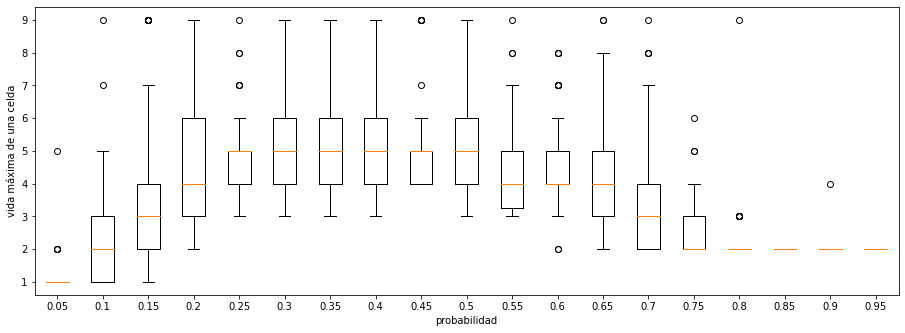

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
bp = ax.boxplot([vm.iloc[0],vm.iloc[1],vm.iloc[2],vm.iloc[3],vm.iloc[4],vm.iloc[5],vm.iloc[6],vm.iloc[7],vm.iloc[8],vm.iloc[9],vm.iloc[10],vm.iloc[11],vm.iloc[12],vm.iloc[13],vm.iloc[14],vm.iloc[15],vm.iloc[16],vm.iloc[17],vm.iloc[18]])
plt.xlabel('probabilidad')
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95])
plt.ylabel('vida máxima de una celda')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')